In [17]:
#Imports
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.manifold import MDS, TSNE


In [5]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Set number label to Y and image data to X
Y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)
X_train = X_train / 255.0
test = test / 255.0

In [9]:
# Each number is 28x28, so reshape to reflect that.
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(
                                                  X_train,
                                                  Y_train,
                                                  test_size=0.1
)

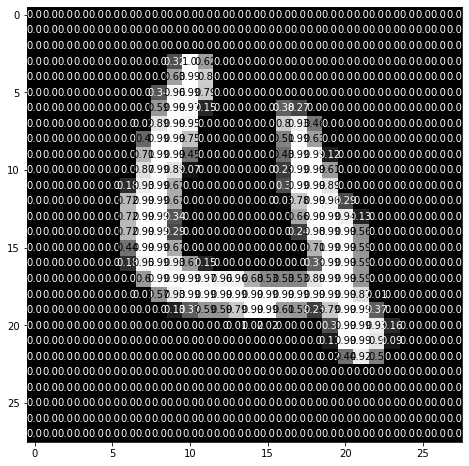

In [19]:
# Uses the values of the pixel to put together a proper image of the number.
def visualize_input(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max() / 2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if img[x][y] < thresh else 'black')

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
visualize_input(X_train[27].reshape(28, 28), ax)

In [12]:
# Set size for testing
batch_size = 86
num_classes = 10
epochs = 10
input_shape = (28, 28, 1)

In [14]:
sample_submission = pd.read_csv('./data/sample_submission.csv')
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [24]:
test['dataset'] = 'test'
train['dataset'] = 'train'

dataset = pd.concat([train.drop('label', axis=1), test]).reset_index()
dataset

,index,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,dataset
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,27995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
69996,27996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
69997,27997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
69998,27998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test


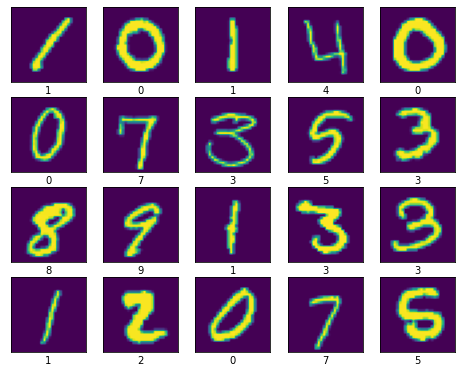

In [26]:
train = pd.read_csv('./data/train.csv')
test_images = pd.read_csv('./data/test.csv')

# Get the label from the training data.
train_label = np.array(train['label'])
train_images = train.drop('label', axis=1)

# Reshape the 784 pixels to 28 x 28
train_images_arr = np.array(train_images).reshape(42000, 28, 28)
test_images_arr = np.array(test_images).reshape(28000, 28, 28)

plt.figure(figsize=(8, 8))
for i in range(20):
  plt.subplot(5, 5, 1 + i)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images_arr[i])
  plt.xlabel(train_label[i])